In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 6.0]

In [47]:
run '/Users/will/workspace/personal/electricitymap/parsers/ENTSOE.py'

In [19]:
consumption = fetch_consumption('ES')
production = fetch_production('ES')

In [57]:
import pandas as pd

def get_exchange(country_from, country_to, start_date, end_date): #, delta
    
    results = fetch_exchange(country_from, country_to, start_date, end_date)
    
    net_flows = []
    timestamps = []
    source_country = []
    target_country = []
    for item in results:
        net_flows.append(item['netFlow'])
        timestamps.append(item['datetime'])
        source_country.append(item['sourceCountry'])
        target_country.append(item['targetCountry'])
        
    return pd.DataFrame({'country_from': source_country, 
                      'country_to': target_country, 
                      'timestamp': timestamps, 
                      'net_flow': net_flows})
    

now = arrow.utcnow()
start_date = now.replace(days=-42)
end_date = now.replace(hours=+24)

net_flows = get_exchange('FR', 'DE', start_date, end_date)

net_flows.head(1)

,country_from,country_to,net_flow,timestamp
0,DE,FR,1730.0,2017-03-10 16:00:00+00:00


In [35]:
net_flows.groupby('country_to').sum().sort_values('net_flow',ascending=False)

,net_flow
country_to,
FR,1115925.0


[<matplotlib.text.Text at 0x10dedddd0>, <matplotlib.text.Text at 0x10eb07810>]

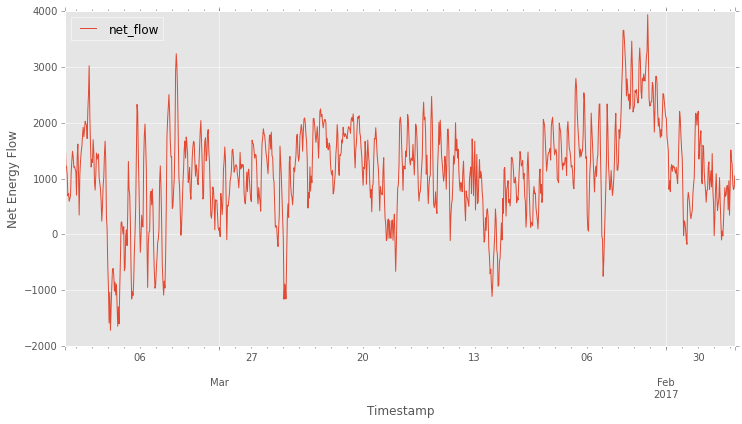

In [60]:

ax = net_flows.plot(x='timestamp', y='net_flow');
ax.set(xlabel="Timestamp", ylabel="Net Energy Flow")


In [67]:
%%time
now = arrow.utcnow()
start_date = now.replace(days=-100)
end_date = now.replace(hours=+24)

prices = fetch_price('ES', start_date, end_date)

CPU times: user 1.61 s, sys: 96.8 ms, total: 1.71 s
Wall time: 3.06 s


In [65]:
prices.head(1)

,currency,price,timestamp
0,EUR,53.0,2016-11-30 00:00:00+00:00


[<matplotlib.text.Text at 0x10ff284d0>, <matplotlib.text.Text at 0x10ff2e650>]

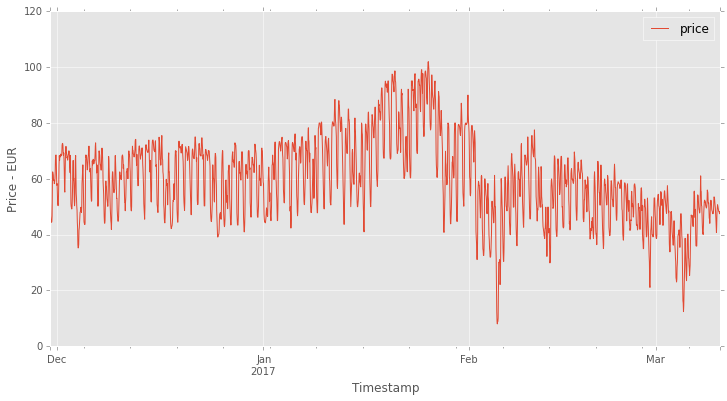

In [66]:
ax = prices.plot(x='timestamp', y='price');
ax.set(xlabel="Timestamp", ylabel="Price - EUR")